In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
# from mpl_toolkits.mplot3d import Axes3D


In [4]:
df = pd.read_csv('/Users/manasvi/Desktop/vscodefiles/Clustering/Customer_Personality_Analysis/marketing_campaign.csv', encoding='utf-8', delimiter='\t')

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
df.head(30)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [7]:
df.shape

(2240, 29)

In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

From the above we can conclude the following:
1. There are few missing values in Income feature
2. Dt_Customer represents the Date of customer's enrollment with the company but it is not represented as datetime
3. There are a few categorical features like Education and Marital_Status. These need to be encoded.


In [10]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [11]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Missing values:

- We can perform Median Imputation or just drop rows containing the missing values.
- As there are only 24 missing values from the Income feature, it wouldn't make any significant difference if we drop these rows.

In [12]:
# Dropping rows with missing values
df = df.dropna()
df.shape

(2216, 29)

In [13]:
# Checking for missing values again
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [14]:
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

Z_CostContact and Z_Revenue has the same value throughout. These contribute nothing and hence can be dropped

In [15]:
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [16]:
df = df.drop(columns=['Z_CostContact','Z_Revenue'], axis = 1)
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0


From the Dt_Customer feature which represents the Date of customer's enrollment with the company we can find the number of days a customer has been enrolled with the company for.

In [17]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
dates = []
# Extract dates
dates = [i.date() for i in df['Dt_Customer']]
#Dates of the newest and oldest recorded customer
print("The newest customer's enrollment date in the records:",max(dates))
print("The oldest customer's enrollment date in the records:",min(dates))

The newest customer's enrollment date in the records: 2014-06-29
The oldest customer's enrollment date in the records: 2012-07-30


Checking the number of days of enrollment with respect to the newest enrolled customer

In [18]:
d1 = df['Dt_Customer'].max()
df['Customer_For'] = (d1 - df['Dt_Customer']).dt.days

In [19]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,161
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,293
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,593
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,417
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1,388
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,108


Feature Engineering of the Marital Status feature

In [20]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [21]:
df['Relationship_Status']=df['Marital_Status'].replace({'Married':'Relationship','Together':'Relationship', 'Single':'Single', 'Divorced':'Single', 'Widow':'Single', 'Alone':'Single', 'Absurd':'Single', 'YOLO':'Single'})
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Relationship_Status
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,663,Single
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,113,Single
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,312,Relationship
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,139,Relationship
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,161,Relationship
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,293,Relationship
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,593,Single
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,417,Relationship
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1,388,Relationship
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,108,Relationship


In [22]:
df['Relationship_Status'].value_counts()

Relationship_Status
Relationship    1430
Single           786
Name: count, dtype: int64

Checking Education column

In [23]:
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [24]:
# Segmenting education levels in three groups
df['Education']=df['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Graduate', 'Graduation':'Graduate', 'Master':'Graduate', 'PhD':'Postgraduate'})
df['Education'].value_counts()

Education
Graduate         1681
Postgraduate      481
Undergraduate      54
Name: count, dtype: int64

Analyzing the Income feature

In [25]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

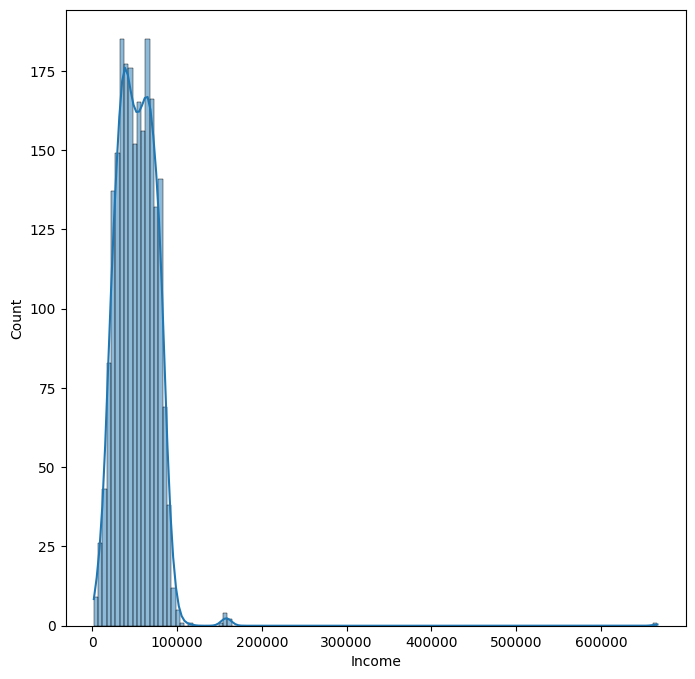

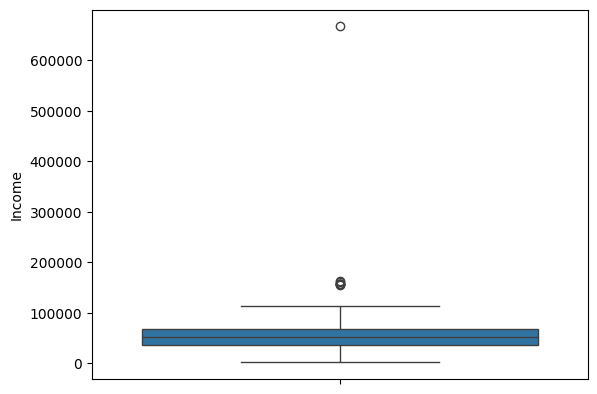

In [26]:
plt.figure(figsize=(8,8))
sns.histplot(data = df['Income'], kde = True)
plt.show()
sns.boxplot(data=df['Income'])
plt.show()

Calculating total number of children at home

In [27]:
df['Children'] = df['Kidhome']+df['Teenhome']
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Relationship_Status,Children
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,663,Single,0
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,113,Single,2
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,312,Relationship,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,139,Relationship,1
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,161,Relationship,1
5,7446,1967,Graduate,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,293,Relationship,1
6,965,1971,Graduate,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,593,Single,1
7,6177,1985,Postgraduate,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,417,Relationship,1
8,4855,1974,Postgraduate,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1,388,Relationship,1
9,5899,1950,Postgraduate,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,108,Relationship,2


In [28]:
# Total expenses on all items 
df['Spent'] = df['MntWines']+ df['MntFruits']+ df['MntMeatProducts']+ df['MntFishProducts']+ df['MntSweetProducts']+ df['MntGoldProds']
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Relationship_Status,Children,Spent
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,663,Single,0,1617
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,113,Single,2,27
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,312,Relationship,0,776
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,139,Relationship,1,53
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,161,Relationship,1,422
5,7446,1967,Graduate,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,293,Relationship,1,716
6,965,1971,Graduate,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,593,Single,1,590
7,6177,1985,Postgraduate,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,417,Relationship,1,169
8,4855,1974,Postgraduate,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1,388,Relationship,1,46
9,5899,1950,Postgraduate,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,108,Relationship,2,49


In [29]:
df['Spent'].describe()

count    2216.000000
mean      607.075361
std       602.900476
min         5.000000
25%        69.000000
50%       396.500000
75%      1048.000000
max      2525.000000
Name: Spent, dtype: float64

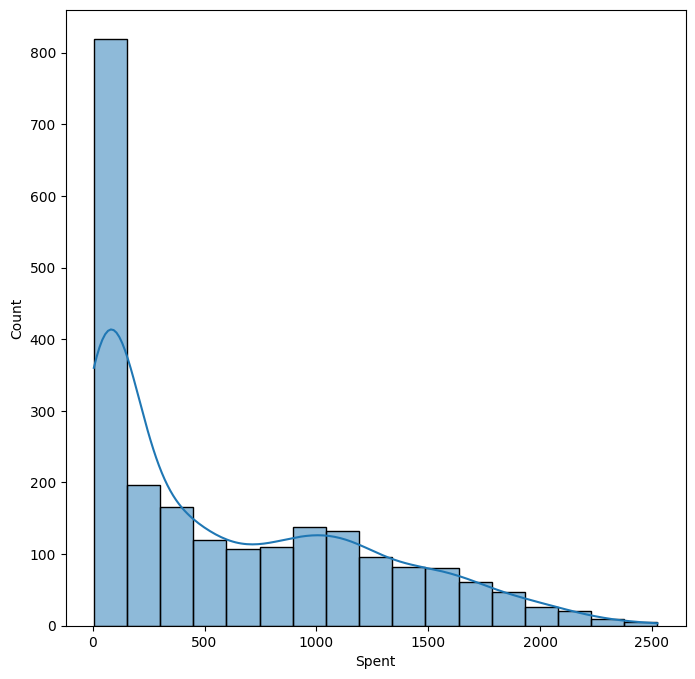

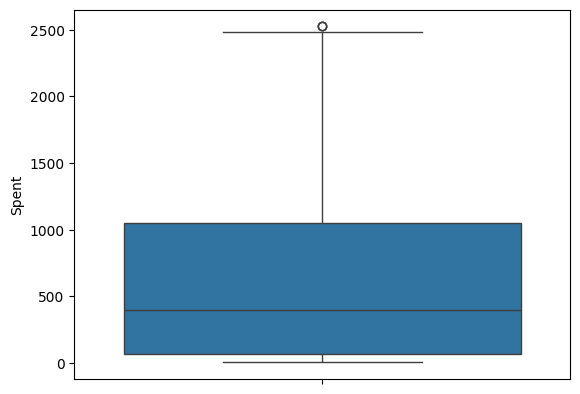

In [30]:
plt.figure(figsize=(8,8))
sns.histplot(data = df['Spent'], kde = True)
plt.show()
sns.boxplot(data=df['Spent'])
plt.show()

In [31]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']+df['Response']
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Relationship_Status,Children,Spent,TotalAcceptedCmp
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,663,Single,0,1617,1
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,113,Single,2,27,0
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,312,Relationship,0,776,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,139,Relationship,1,53,0
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,161,Relationship,1,422,0
5,7446,1967,Graduate,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,293,Relationship,1,716,0
6,965,1971,Graduate,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,593,Single,1,590,0
7,6177,1985,Postgraduate,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,417,Relationship,1,169,0
8,4855,1974,Postgraduate,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1,388,Relationship,1,46,1
9,5899,1950,Postgraduate,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,108,Relationship,2,49,1


In [32]:
df['TotalAcceptedCmp'].value_counts()

TotalAcceptedCmp
0    1611
1     369
2     139
3      51
4      36
5      10
Name: count, dtype: int64

In [33]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['NumTotalPurchases'].describe()


count    2216.000000
mean       14.880866
std         7.670957
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: NumTotalPurchases, dtype: float64

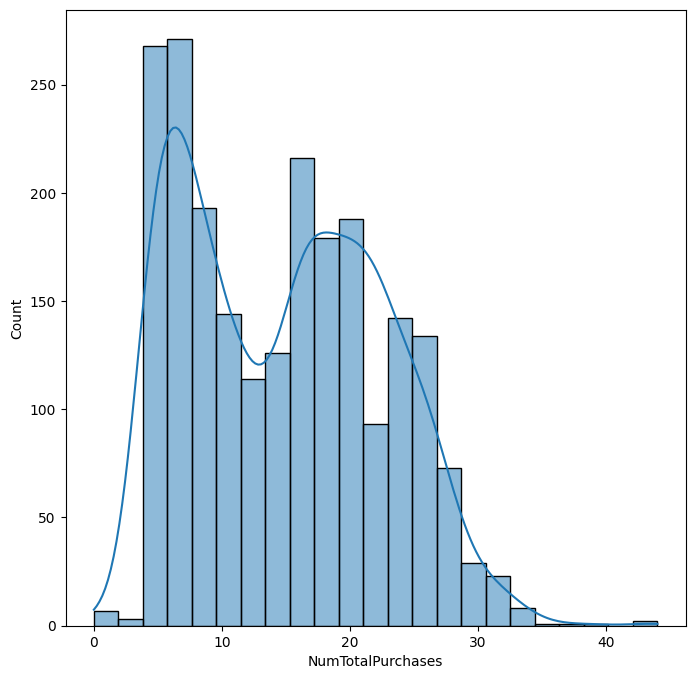

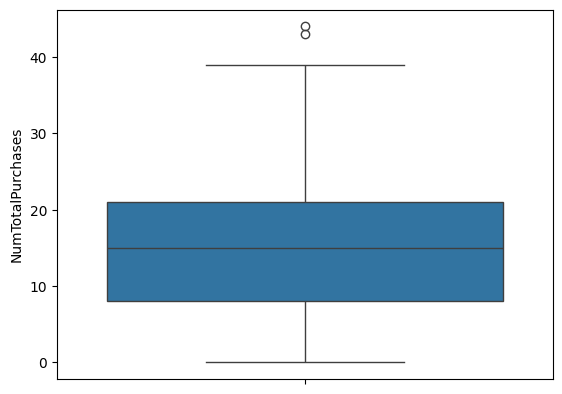

In [34]:
plt.figure(figsize=(8,8))
sns.histplot(data = df['NumTotalPurchases'], kde = True)
plt.show()
sns.boxplot(data=df['NumTotalPurchases'])
plt.show()

In [35]:
df['Year_Birth'].describe()

count    2216.000000
mean     1968.820397
std        11.985554
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [36]:
# Age of customer today
df['Age'] = 2024 - df['Year_Birth']

In [37]:
# Dropping some of the redundant features
to_drop = ['ID', 'Marital_Status', 'Dt_Customer', 'Year_Birth']
df = df.drop(to_drop, axis=1)
df.head(10)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Relationship_Status,Children,Spent,TotalAcceptedCmp,NumTotalPurchases,Age
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,663,Single,0,1617,1,25,67
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,113,Single,2,27,0,6,70
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,312,Relationship,0,776,0,21,59
3,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,139,Relationship,1,53,0,8,40
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,161,Relationship,1,422,0,19,43
5,Graduate,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,293,Relationship,1,716,0,22,57
6,Graduate,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,593,Single,1,590,0,21,53
7,Postgraduate,33454.0,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,417,Relationship,1,169,0,10,39
8,Postgraduate,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1,388,Relationship,1,46,1,6,50
9,Postgraduate,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,108,Relationship,2,49,1,2,74


In [38]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Children,Spent,TotalAcceptedCmp,NumTotalPurchases,Age
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,353.521209,0.947202,607.075361,0.448556,14.880866,55.179603
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,202.434667,0.749062,602.900476,0.892440,7.670957,11.985554
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,28.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,69.000000,0.000000,8.000000,47.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,355.500000,1.000000,396.500000,0.000000,15.000000,54.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,529.000000,1.000000,1048.000000,1.000000,21.000000,65.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,699.000000,3.000000,2525.000000,5.000000,44.000000,131.000000


- We can see discrepancy in max and mean of Income, max and mean of Age.
- Max age is 131 as we calculated age today
- We need to plot graphs to understand the data better.

In [39]:
df['Children']=df['Kidhome']+df['Teenhome']
# Create the Is_Parent feature
df['Is_Parent'] = np.where(df.Children > 0, 1, 0)
df.head(10)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Relationship_Status,Children,Spent,TotalAcceptedCmp,NumTotalPurchases,Age,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,663,Single,0,1617,1,25,67,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,113,Single,2,27,0,6,70,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,312,Relationship,0,776,0,21,59,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,139,Relationship,1,53,0,8,40,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,161,Relationship,1,422,0,19,43,1
5,Graduate,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,293,Relationship,1,716,0,22,57,1
6,Graduate,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,593,Single,1,590,0,21,53,1
7,Postgraduate,33454.0,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,417,Relationship,1,169,0,10,39,1
8,Postgraduate,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1,388,Relationship,1,46,1,6,50,1
9,Postgraduate,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,108,Relationship,2,49,1,2,74,1


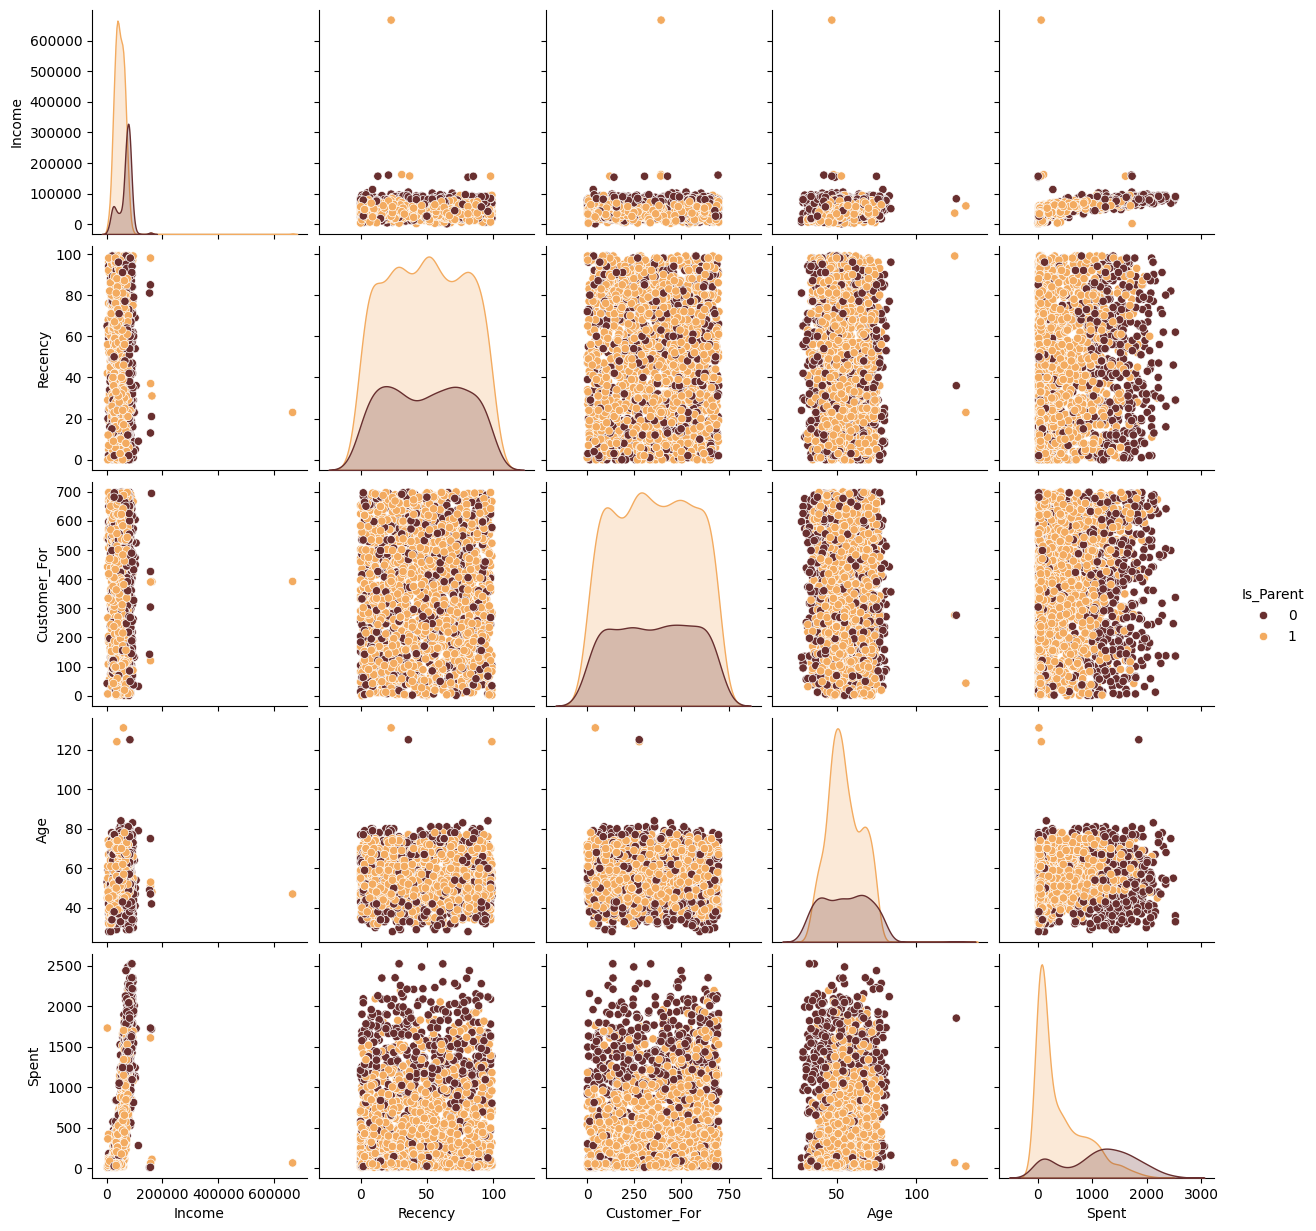

<Figure size 640x480 with 0 Axes>

In [40]:
to_plot = ['Income', 'Recency', 'Customer_For', 'Age', 'Spent','Is_Parent']
df_to_plot = df[to_plot]
sns.pairplot(df_to_plot, hue = 'Is_Parent', palette= (["#682F2F","#F3AB60"]))
plt.figure()
plt.show()

We can see a few outliers in Age and Income column. We can delete these outliers

In [41]:
# Dropping the outliers by setting a cap on Age and income. 
df = df[(df["Age"]<90)]
df = df[(df["Income"]<700000)]
df.shape

(2213, 31)

<Axes: >

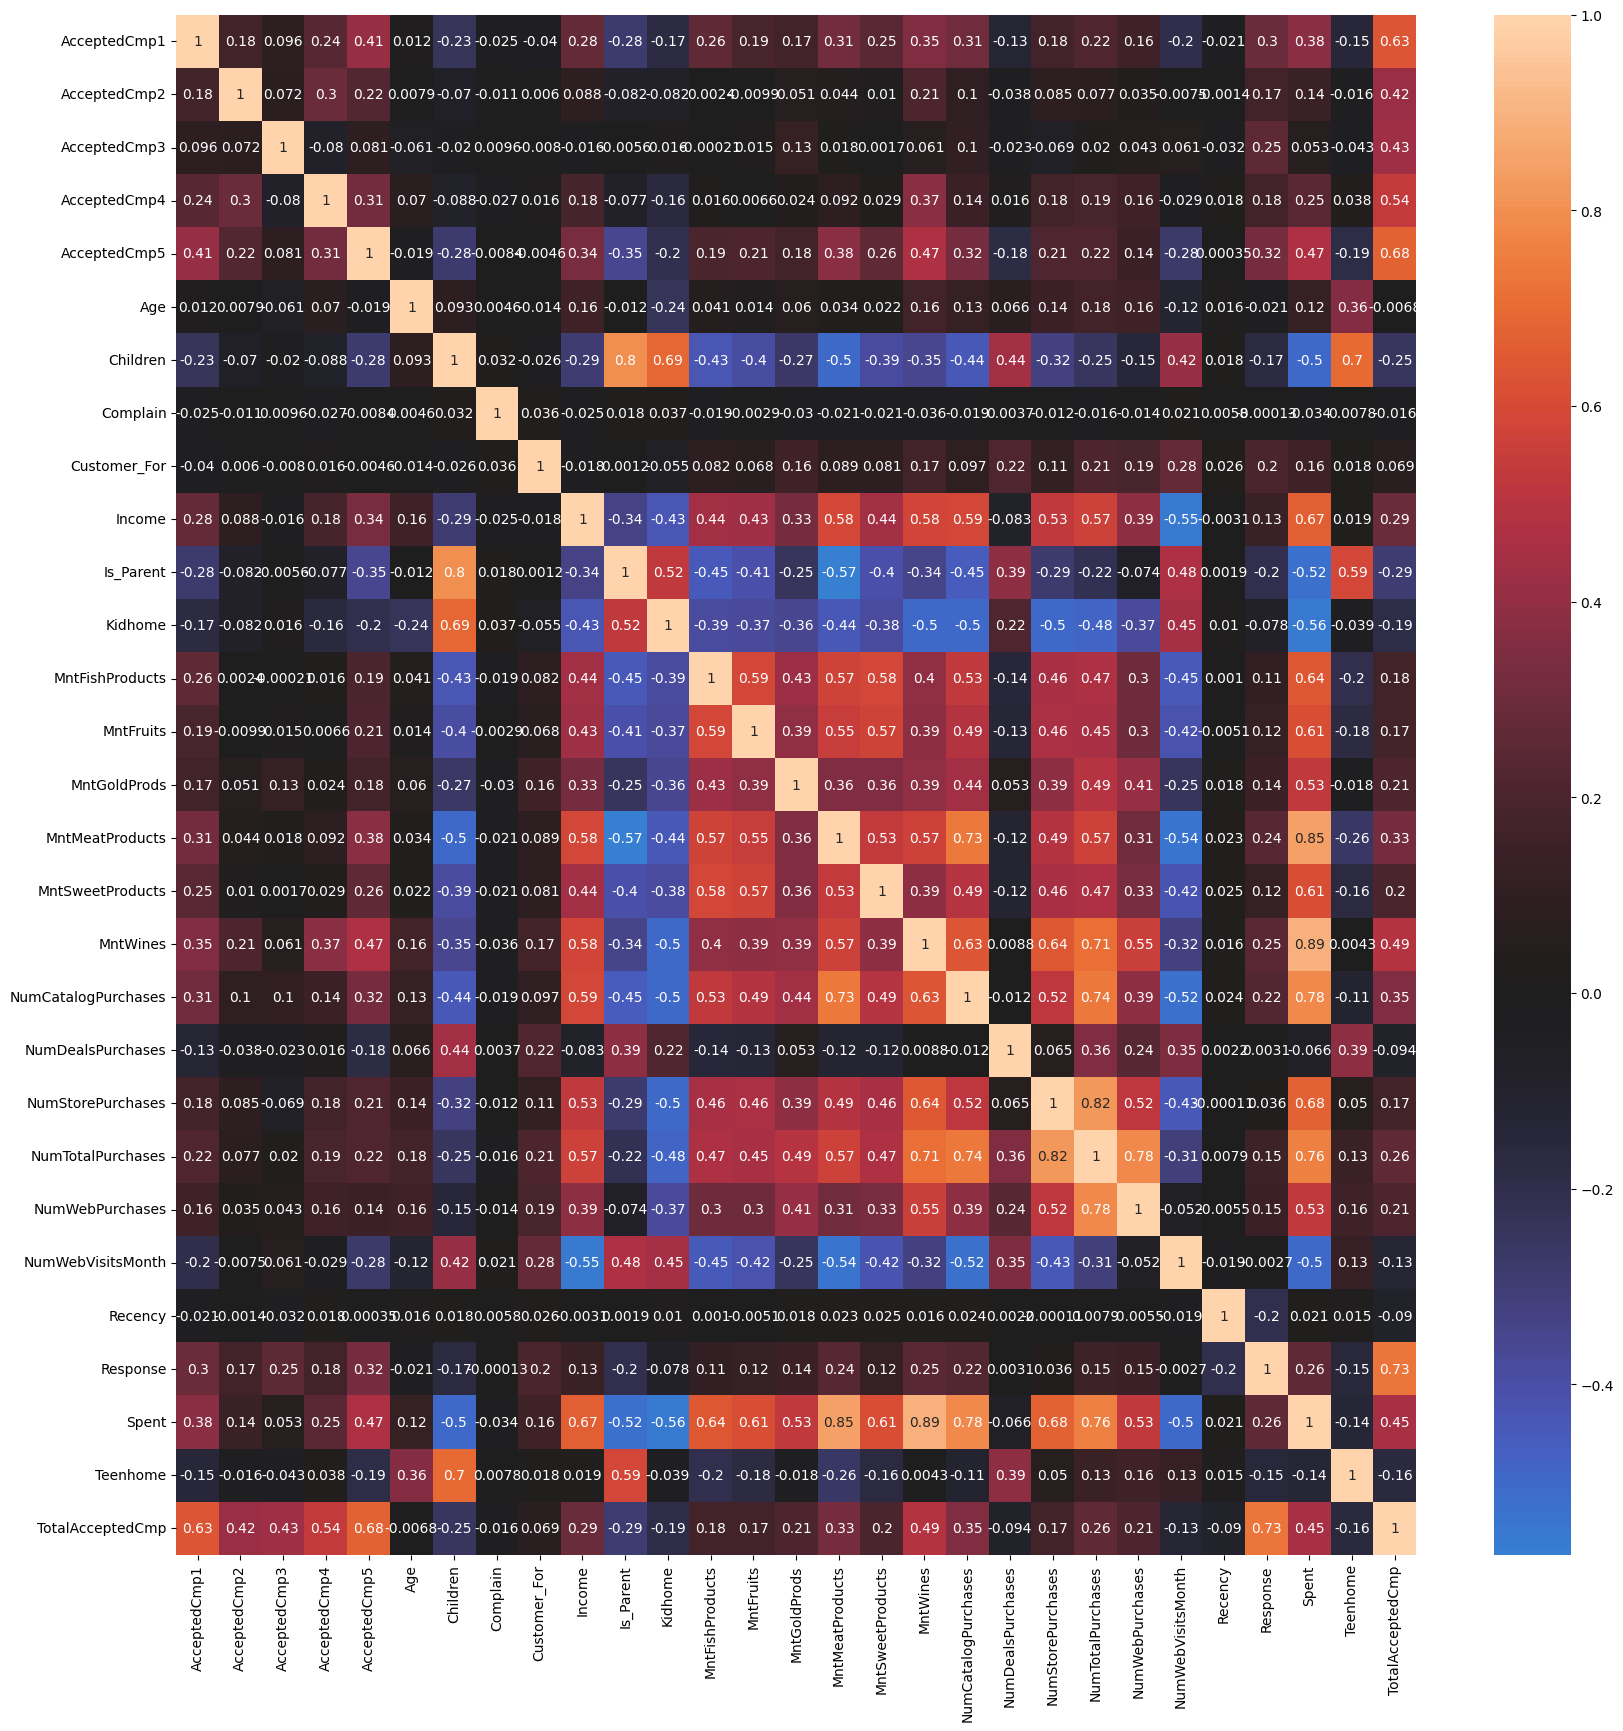

In [42]:
# Define the columns to exclude
exclude_columns = ['Education', 'Relationship_Status']

# Select columns to include in the correlation matrix
include_columns = df.columns.difference(exclude_columns)

# Calculate the correlation matrix
corrmat = df[include_columns].corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0)

We can perform bivariate analysis to see how features are related.

<Axes: title={'center': 'Impact of Education on Expenses'}, xlabel='Education', ylabel='Spent'>

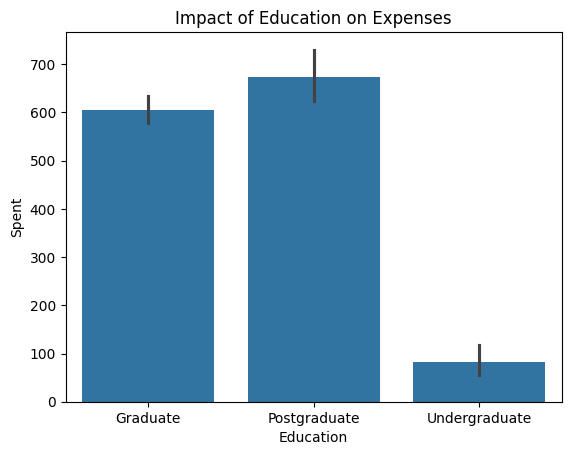

In [43]:
plt.title("Impact of Education on Expenses")
sns.barplot(x='Education', y='Spent', data=df)

- Mean: The height of each bar represents the mean value of the Spent column for each Education category.
- Confidence Interval: The black line in the middle of the bar represents the range within which we are 95% confident that the true mean lies. This interval is calculated using the standard error of the mean (SEM).
- A shorter line indicates a narrower confidence interval, suggesting less variability and more confidence in the mean value.
- A longer line indicates a wider confidence interval, suggesting more variability and less confidence in the mean value.

<Axes: title={'center': 'Impact of Relationship Status on Expenses'}, xlabel='Relationship_Status', ylabel='Spent'>

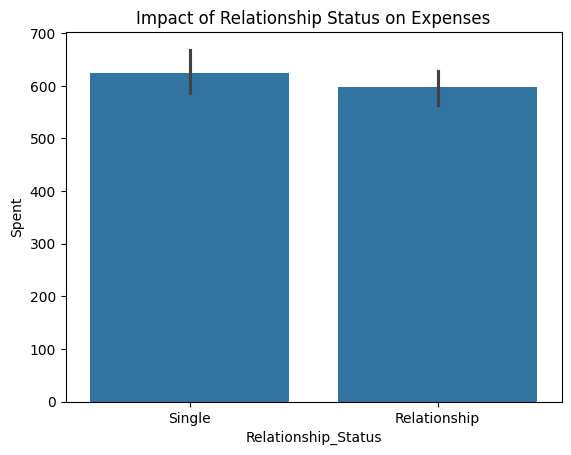

In [44]:
plt.title("Impact of Relationship Status on Expenses")
sns.barplot(x='Relationship_Status', y='Spent', data=df)

<Axes: title={'center': 'Impact of having Children on Expenses'}, xlabel='Children', ylabel='Spent'>

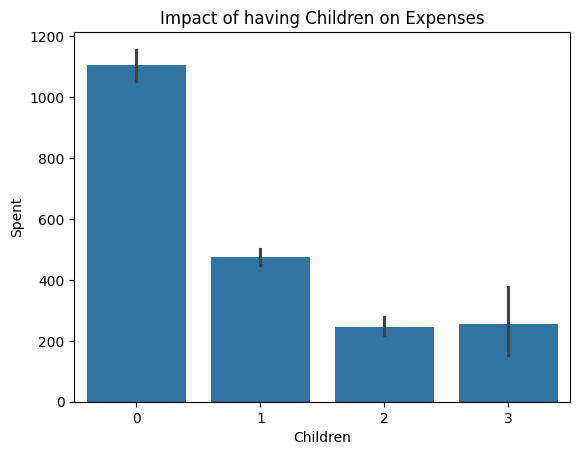

In [45]:
plt.title("Impact of having Children on Expenses")
sns.barplot(x='Children', y='Spent', data=df)

<Axes: title={'center': 'Impact of Total number of accepted coupons/promotions on Expenses'}, xlabel='TotalAcceptedCmp', ylabel='Spent'>

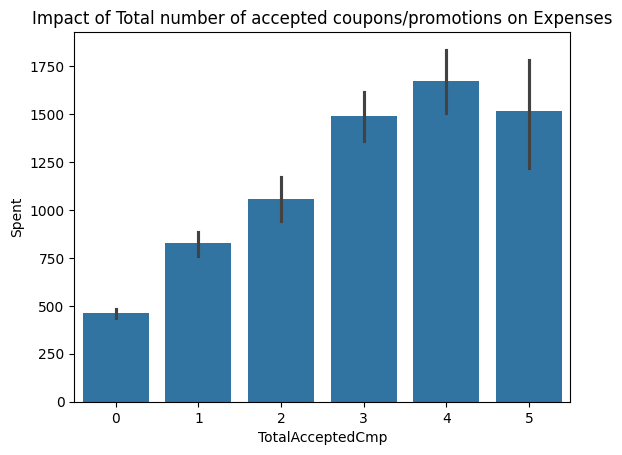

In [46]:
plt.title("Impact of Total number of accepted coupons/promotions on Expenses")
sns.barplot(x='TotalAcceptedCmp', y='Spent', data=df)

DATA PREPROCESSIING

In [47]:
df.dtypes

Education               object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Customer_For             int64
Relationship_Status     object
Children                 int64
Spent                    int64
TotalAcceptedCmp         int64
NumTotalPurchases        int64
Age                      int64
Is_Parent                int64
dtype: object

In [48]:
obj_features = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        obj_features.append(i)
print(" Object are:",obj_features)

 Object are: ['Education', 'Relationship_Status']


Label Encoding for the categorical columns

In [49]:
LE = LabelEncoder()
for i in obj_features:
    df[i] = LE.fit_transform(df[i])
df.head(10)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Relationship_Status,Children,Spent,TotalAcceptedCmp,NumTotalPurchases,Age,Is_Parent
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,663,1,0,1617,1,25,67,0
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,113,1,2,27,0,6,70,1
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,312,0,0,776,0,21,59,0
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,139,0,1,53,0,8,40,1
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,161,0,1,422,0,19,43,1
5,0,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,293,0,1,716,0,22,57,1
6,0,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,593,1,1,590,0,21,53,1
7,1,33454.0,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,417,0,1,169,0,10,39,1
8,1,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1,388,0,1,46,1,6,50,1
9,1,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,108,0,2,49,1,2,74,1


Standardizing data to a common scale

In [50]:
# creating a copy of the dataset
ds = df.copy()
# dropping unnecessary columns
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
ds.head(10)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Relationship_Status,Children,Spent,TotalAcceptedCmp,NumTotalPurchases,Age,Is_Parent
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,663,1,0,1617,1,25,67,0
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,113,1,2,27,0,6,70,1
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,312,0,0,776,0,21,59,0
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,139,0,1,53,0,8,40,1
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,161,0,1,422,0,19,43,1
5,0,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,293,0,1,716,0,22,57,1
6,0,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,593,1,1,590,0,21,53,1
7,1,33454.0,1,0,32,76,10,56,3,1,23,2,4,0,4,8,417,0,1,169,0,10,39,1
8,1,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,388,0,1,46,1,6,50,1
9,1,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,108,0,2,49,1,2,74,1


In [51]:
ds.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Customer_For', 'Relationship_Status', 'Children', 'Spent',
       'TotalAcceptedCmp', 'NumTotalPurchases', 'Age', 'Is_Parent'],
      dtype='object')

In [52]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ds)
ds_scaled = pd.DataFrame(scaled_data, columns = ds.columns, index = ds.index)
ds_scaled.head(10)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Relationship_Status,Children,Spent,TotalAcceptedCmp,NumTotalPurchases,Age,Is_Parent
0,-0.538002,0.234435,-0.823208,-0.929307,0.310773,0.978107,1.552498,1.690807,2.454109,1.484200,0.852974,0.350656,1.427316,2.504247,-0.555456,0.692198,1.527968,1.350076,-1.264914,1.676723,0.617576,1.318395,1.018785,-1.581639
1,-0.538002,-0.234084,1.039532,0.908545,-0.380424,-0.872266,-0.637451,-0.718020,-0.650863,-0.633818,-0.733466,-0.169104,-1.126455,-0.571168,-1.170837,-0.132699,-1.189356,1.350076,1.404857,-0.962927,-0.502666,-1.159238,1.275248,0.632255
2,-0.538002,0.769733,-0.823208,-0.929307,-0.795142,0.358351,0.570796,-0.178264,1.339972,-0.146917,-0.036980,-0.688863,1.427316,-0.229456,1.290688,-0.545148,-0.206179,-0.740699,-1.264914,0.280531,-0.502666,0.796788,0.334882,-1.581639
3,-0.538002,-1.016592,1.039532,-0.929307,-0.795142,-0.872266,-0.561936,-0.655569,-0.504747,-0.585128,-0.752813,-0.169104,-0.761631,-0.912881,-0.555456,0.279749,-1.060901,-0.740699,0.069971,-0.919763,-0.502666,-0.898435,-1.289387,0.632255
4,1.486824,0.240593,1.039532,-0.929307,1.554927,-0.391881,0.419766,-0.218411,0.152777,-0.000847,-0.559344,1.390175,0.332842,0.112257,0.059925,-0.132699,-0.952208,-0.740699,0.069971,-0.307165,-0.502666,0.535985,-1.032923,0.632255
5,-0.538002,0.408233,-0.823208,0.908545,-1.140740,0.637093,0.394594,-0.307627,-0.687392,0.364328,-0.578691,-0.169104,0.697667,0.453970,1.290688,0.279749,-0.300050,-0.740699,0.069971,0.180921,-0.502666,0.927190,0.163906,0.632255
6,-0.538002,0.135003,-0.823208,0.908545,-0.518663,-0.208030,0.973546,-0.013215,0.225835,0.534744,-0.327183,0.870415,1.062491,0.112257,0.367616,0.279749,1.182127,1.350076,0.069971,-0.028259,-0.502666,0.796788,-0.178045,0.632255
7,1.486824,-0.746143,1.039532,-0.929307,-0.587783,-0.679519,-0.410905,-0.494980,-0.632598,-0.633818,-0.404570,-0.169104,-0.031982,-0.912881,-0.555456,1.104647,0.312583,-0.740699,0.069971,-0.727185,-0.502666,-0.637631,-1.374874,0.632255
8,1.486824,-0.869410,1.039532,-0.929307,-1.037061,-0.863370,-0.662623,-0.637726,-0.632598,-0.585128,-0.810853,-0.688863,-0.396806,-0.912881,-1.170837,1.517096,0.169306,-0.740699,0.069971,-0.931384,0.617576,-1.159238,-0.434508,0.632255
9,1.486824,-1.850743,1.039532,0.908545,0.656371,-0.821855,-0.662623,-0.718020,-0.669128,-0.633818,-0.598038,-0.688863,-1.126455,-0.912881,-1.786219,6.054032,-1.214059,-0.740699,1.404857,-0.926404,0.617576,-1.680845,1.617199,0.632255


Dimensionality Reduction with PCA

Finding explained variance 

In [53]:
# Apply PCA
# pca = PCA()
# pca.fit(ds_scaled)

In [54]:
# explained_variance_ratio = pca.explained_variance_ratio_
# cumulative_explained_variance = np.cumsum(explained_variance_ratio)

In [55]:
# plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('Cumulative Explained Variance by PCA Components')
# plt.grid()
# plt.show()


In [56]:
# threshold = 0.90
# n_components = np.argmax(cumulative_explained_variance >= threshold) + 1
# print(f'Number of components to explain {threshold*100}% variance: {n_components}')

In [57]:
n_components = 14
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(ds_scaled)

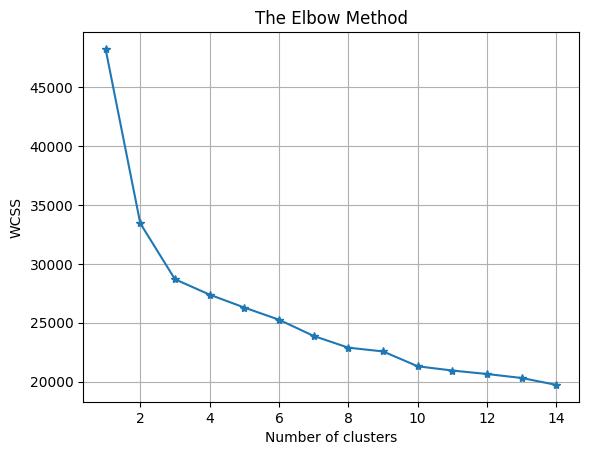

In [58]:
# Using the elbow method to find the optimal number of clusters
wcss = []
range_n_clusters = range(1, 15)
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range_n_clusters, wcss, marker='*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

- The WCSS sharply decreases from 1 to 3 clusters.
- After 3 clusters, the rate of decrease in WCSS slows down, and the curve starts to flatten.

In [59]:
# Use KneeLocator to find the optimal k
kneedle = KneeLocator(range_n_clusters, wcss, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow
print(f'Optimal number of clusters determined by the elbow method: {optimal_k}')

Optimal number of clusters determined by the elbow method: 3


In [60]:
# Step 4: Evaluate Clustering with the Silhouette Score
silhouette_scores = []
k_range = range(2, 15)  # start from 2 to avoid division by zero in silhouette score calculation
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    score = silhouette_score(pca_data, kmeans.labels_)
    silhouette_scores.append(score)

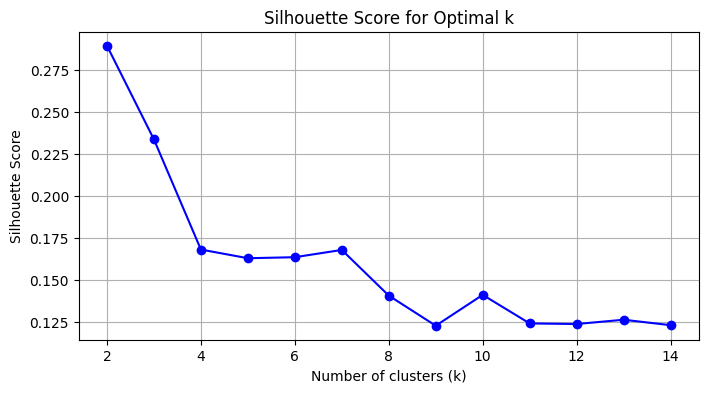

In [61]:
# Plot the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid()
plt.show()

In [62]:
# Print the silhouette score for the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(pca_data)
optimal_silhouette_score = silhouette_score(pca_data, kmeans_optimal.labels_)
print(f'Silhouette Score for optimal number of clusters ({optimal_k}): {optimal_silhouette_score:.2f}')

Silhouette Score for optimal number of clusters (3): 0.23


In [63]:
# Fit K-Means with the optimal number of clusters (3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=50)
y_kmeans = kmeans.fit_predict(pca_data)

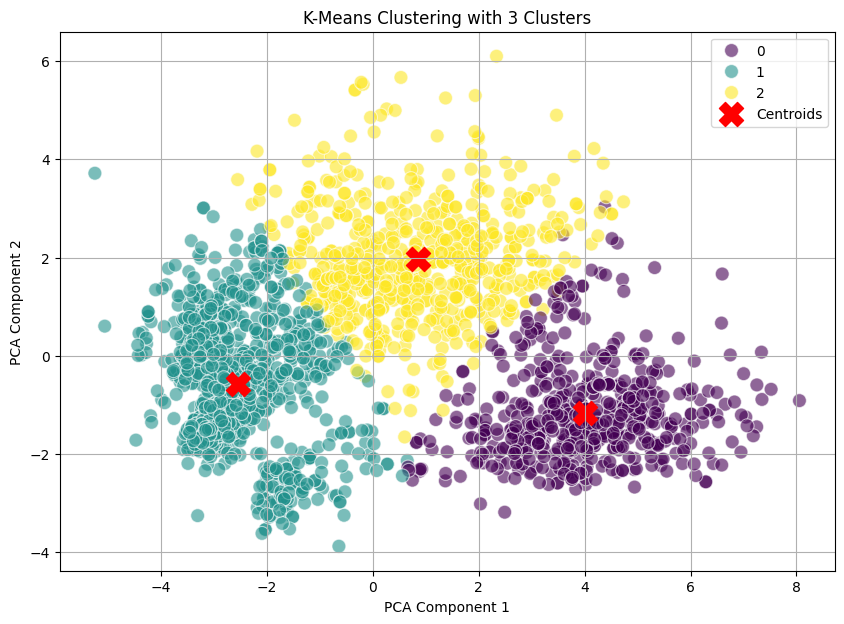

In [64]:
# Scatter plot of the clusters in the PCA-reduced feature space
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=y_kmeans, palette='viridis', s=100, alpha=0.6, edgecolor='w')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering with 3 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [65]:
# # Inverse transform the cluster centers to the original scaled feature space
# centroids_scaled = pca.inverse_transform(kmeans.cluster_centers_)

# # Inverse transform the centroids to the original feature space
# centroids_original = scaler.inverse_transform(centroids_scaled)

# pal = ["#5A0D9E", "#0D9E91", "#7E2411"]

# # Scatter plot of the clusters using 'Income' and 'Spent'
# plt.figure(figsize=(10, 7))
# sns.scatterplot(x=ds['Income'], y=ds['Spent'], hue=y_kmeans, palette = pal, s=100, alpha=0.6, edgecolor='w')
# plt.scatter(centroids_original[:, ds.columns.get_loc('Income')], centroids_original[:, ds.columns.get_loc('Spent')], 
#             s=300, c='red', marker='X', label='Centroids')
# plt.title('K-Means Clustering with 3 Clusters (Income vs Spent)')
# plt.xlabel('Income')
# plt.ylabel('Spent')
# plt.legend()
# plt.grid(True)
# plt.show()

In [66]:
# # Inferences from K-Means Clustering
# print("Cluster Centers (in 14-dimensional PCA space):")
# print(kmeans.cluster_centers_)
# print("\nCluster Sizes:")
# print(np.bincount(y_kmeans))

Boxplots to understand how each feature varies across different cluster. 

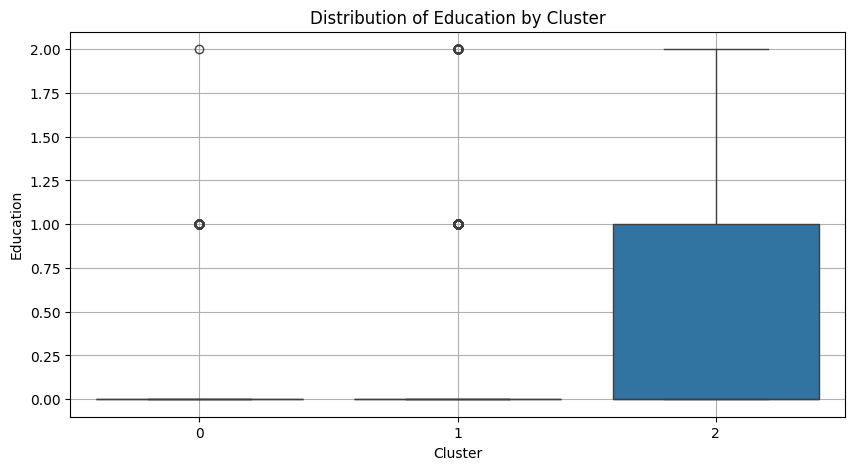

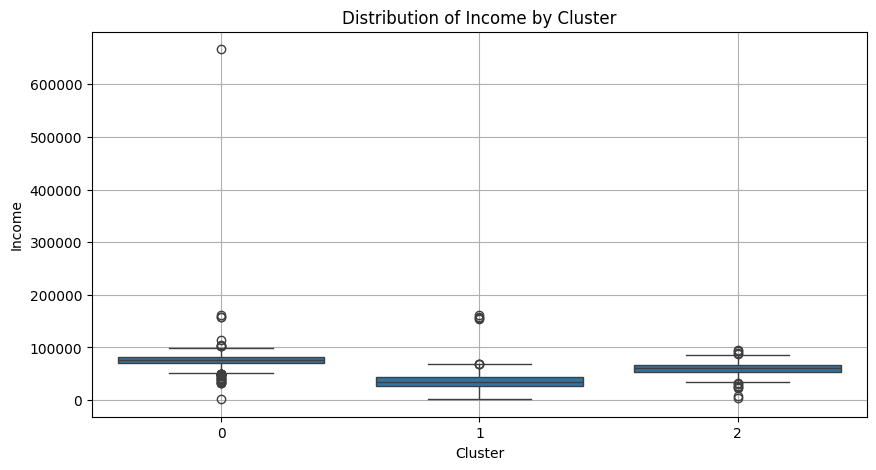

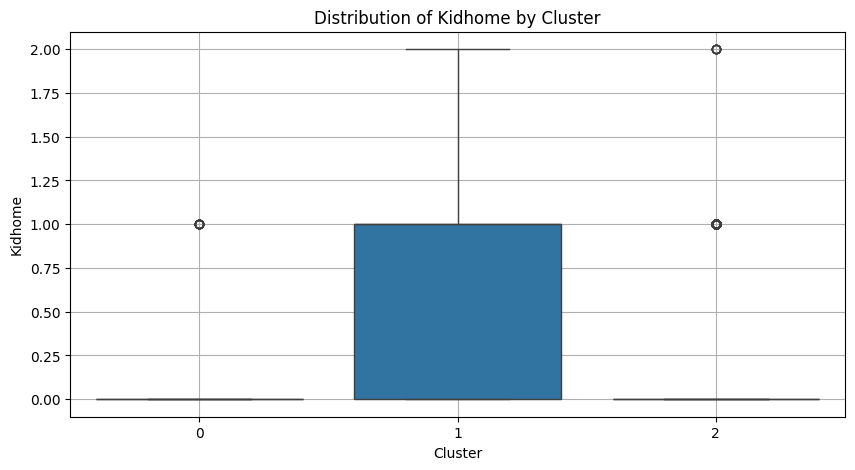

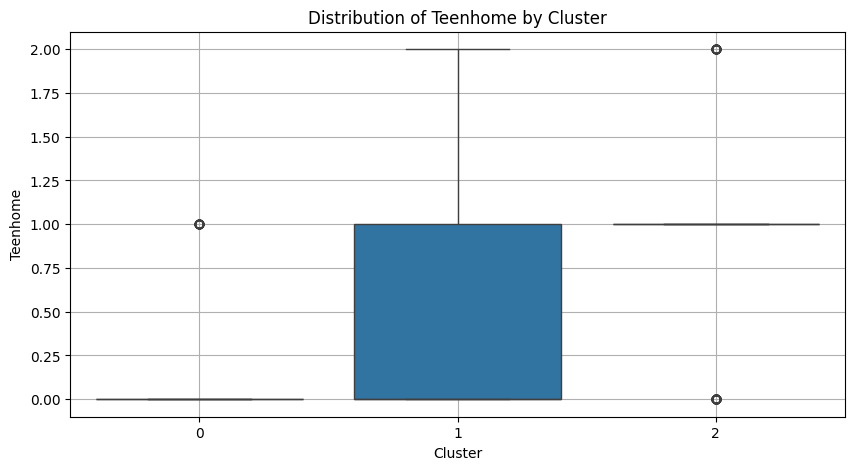

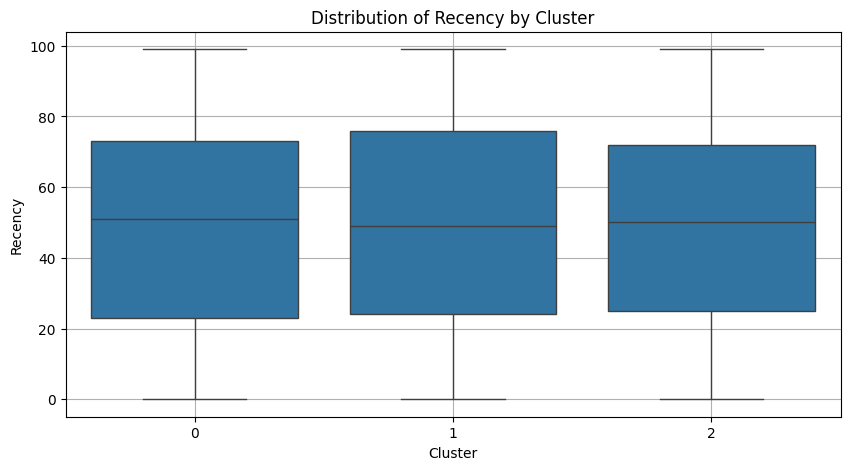

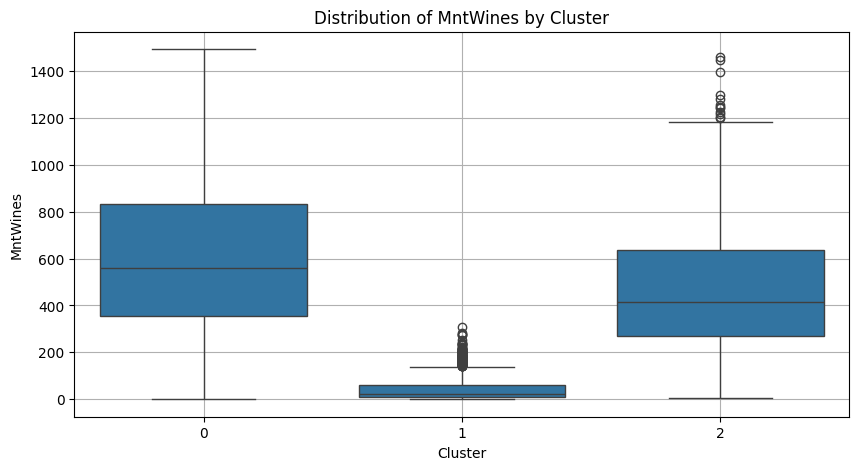

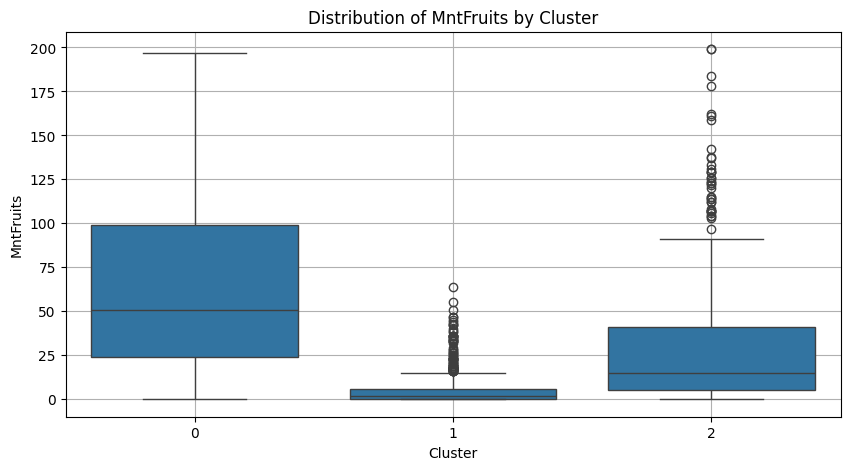

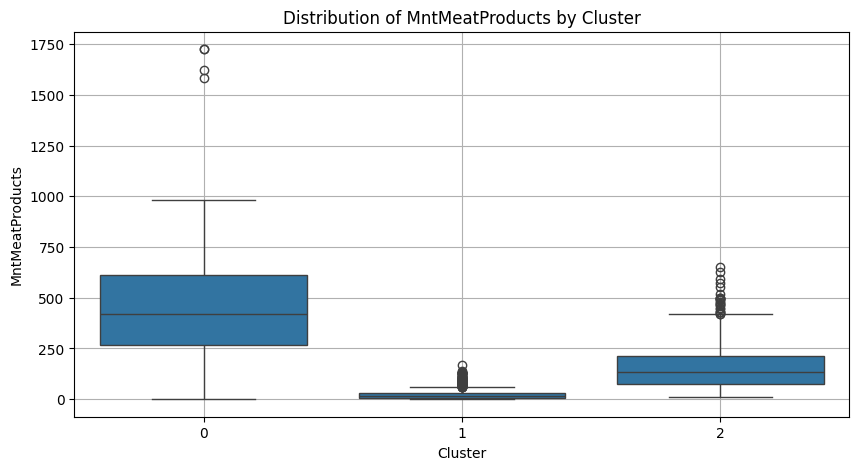

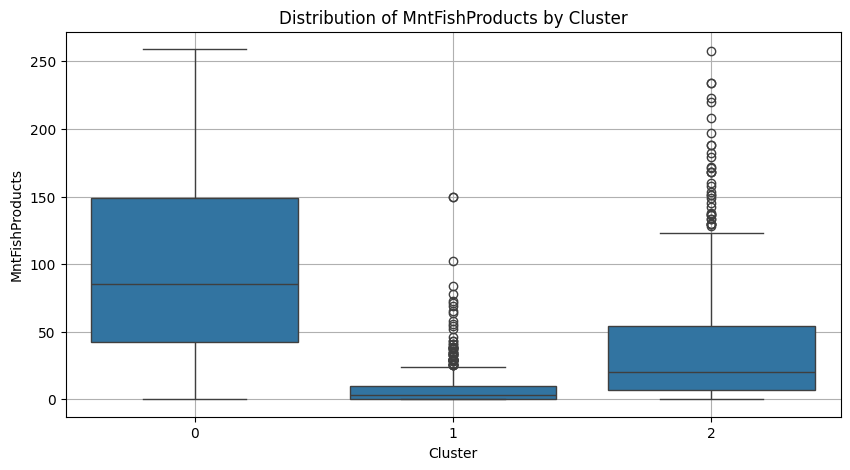

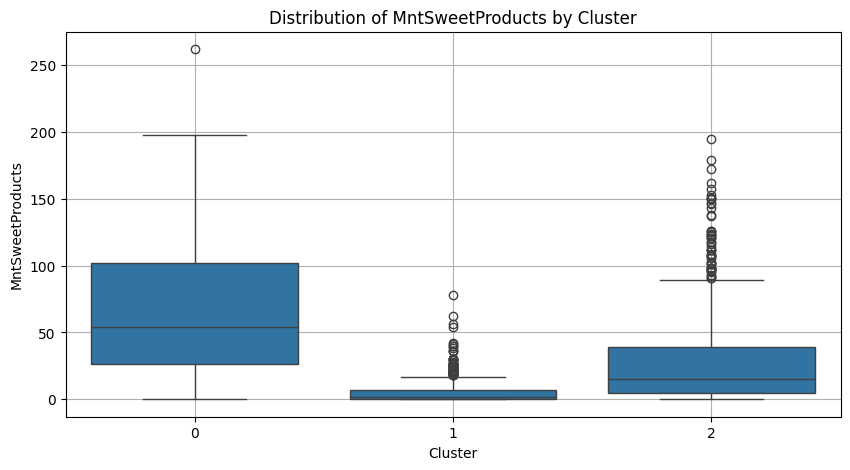

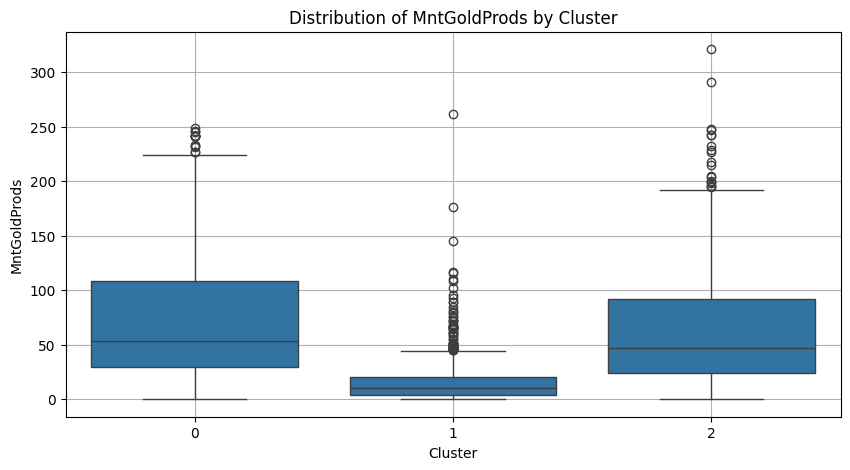

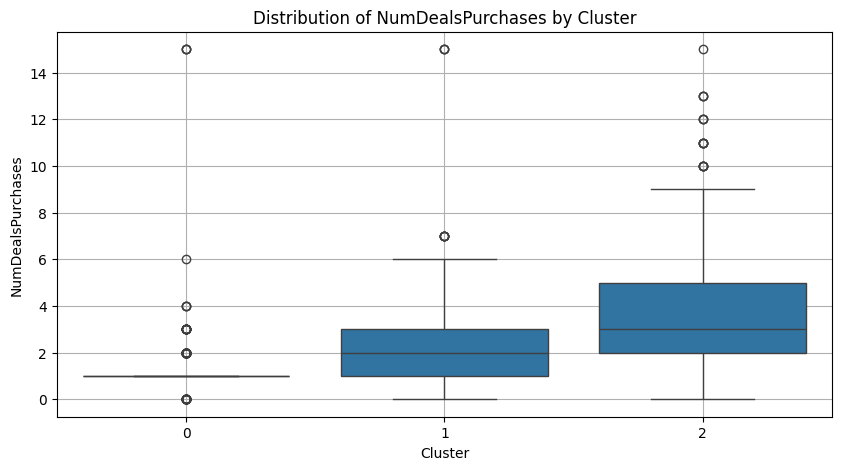

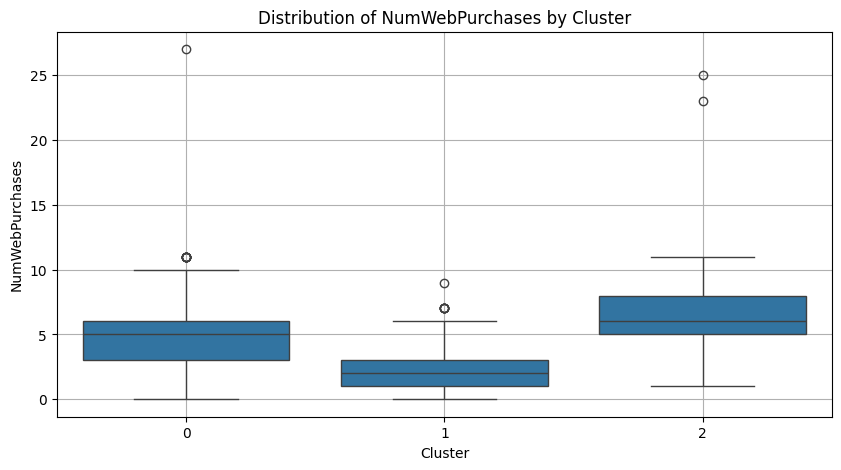

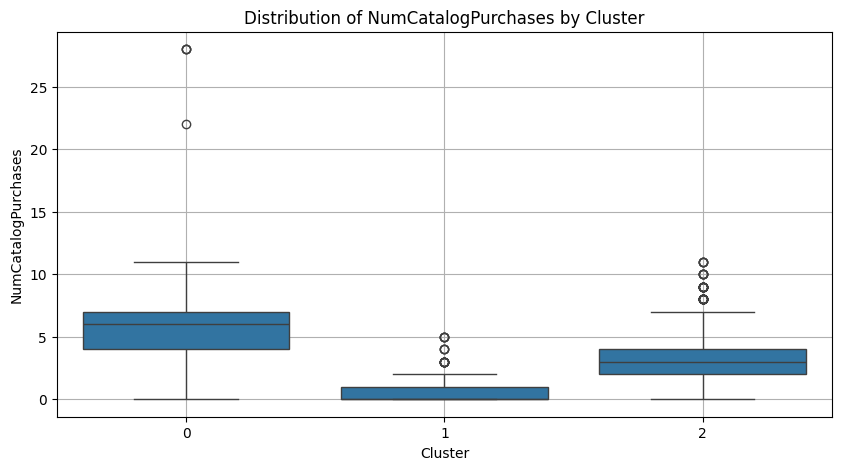

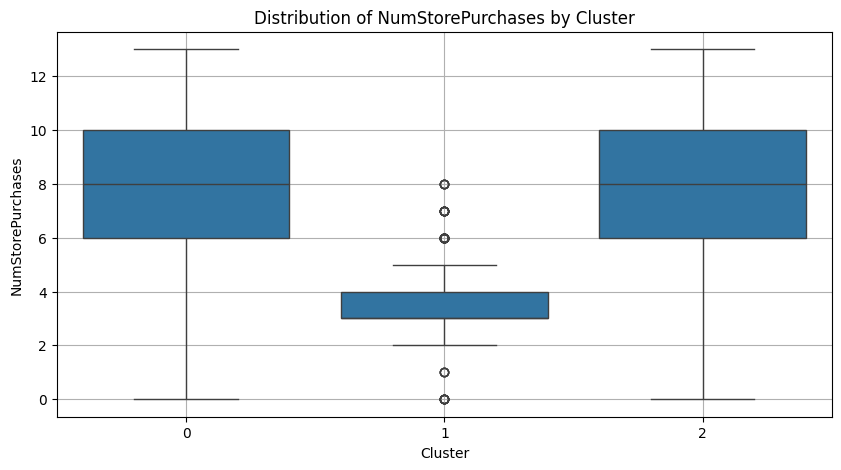

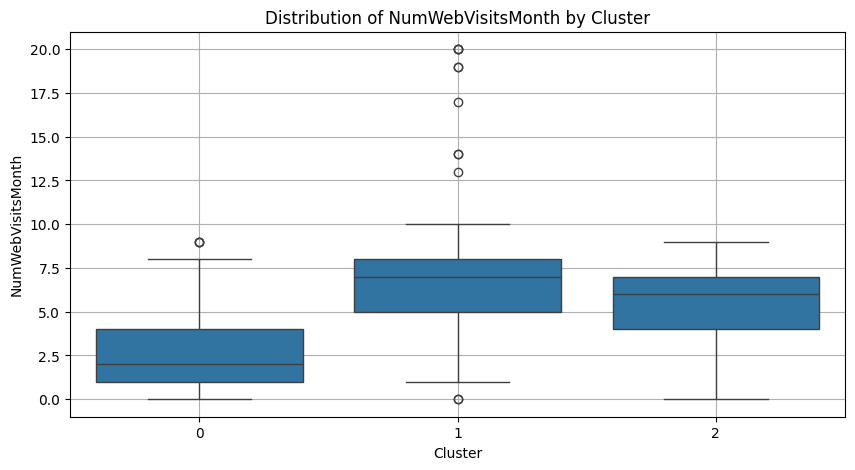

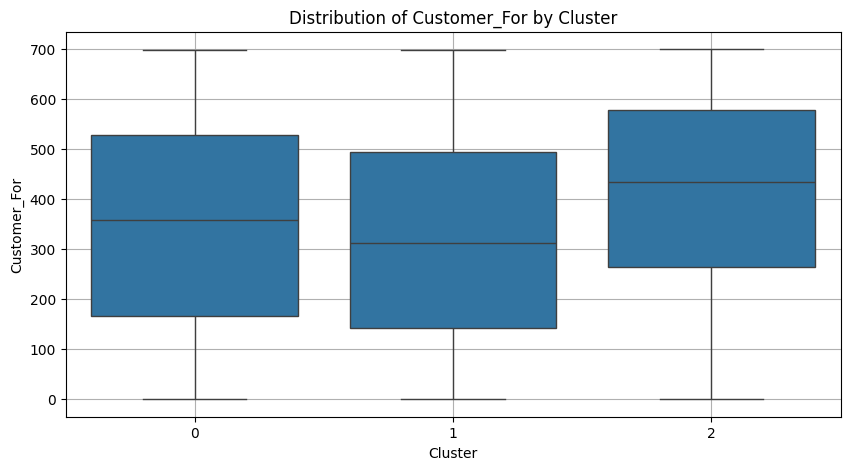

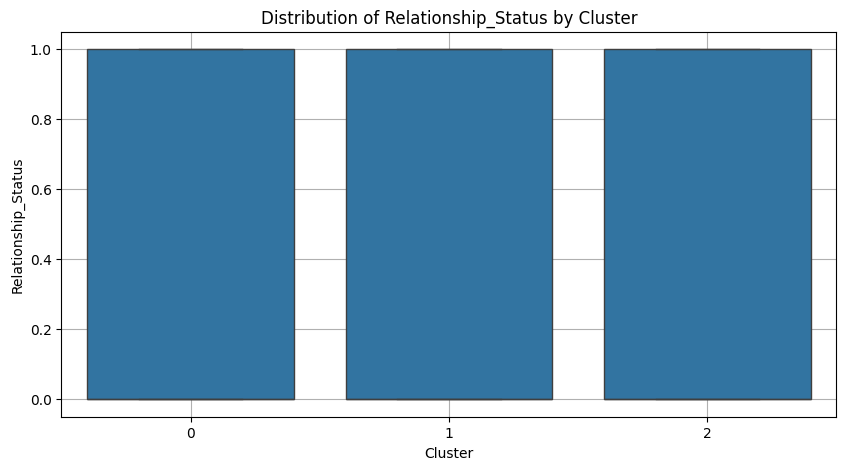

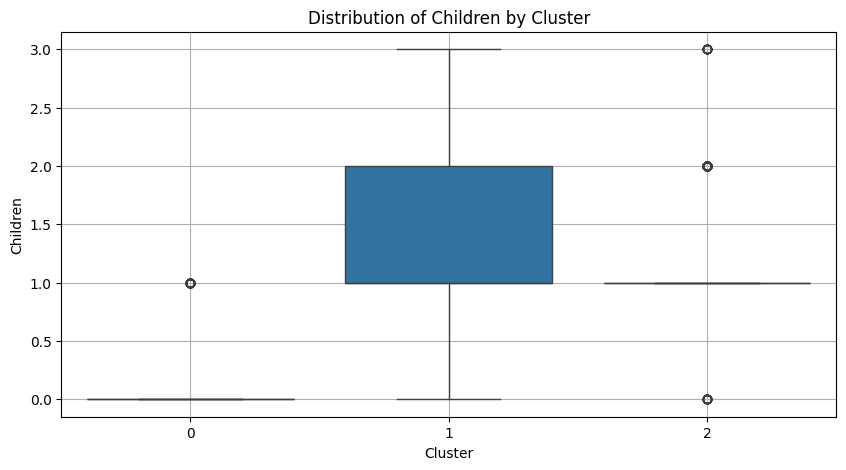

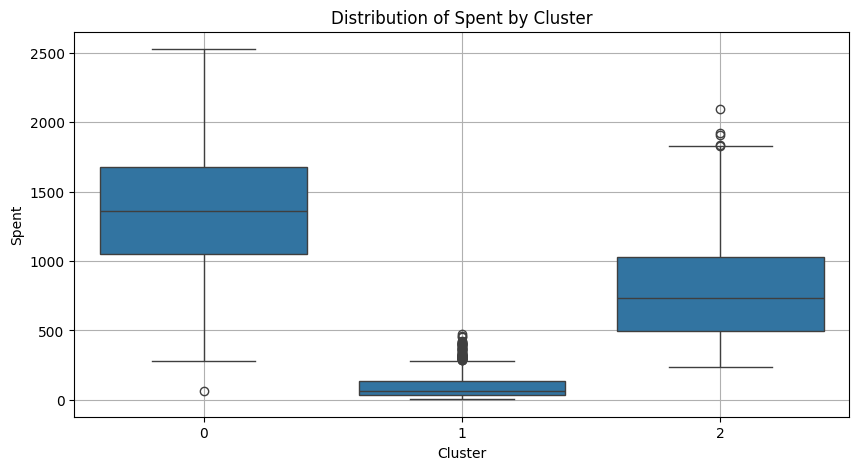

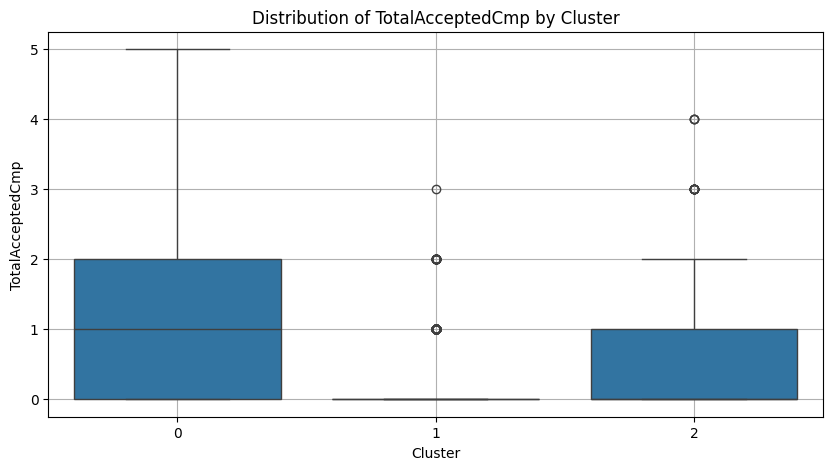

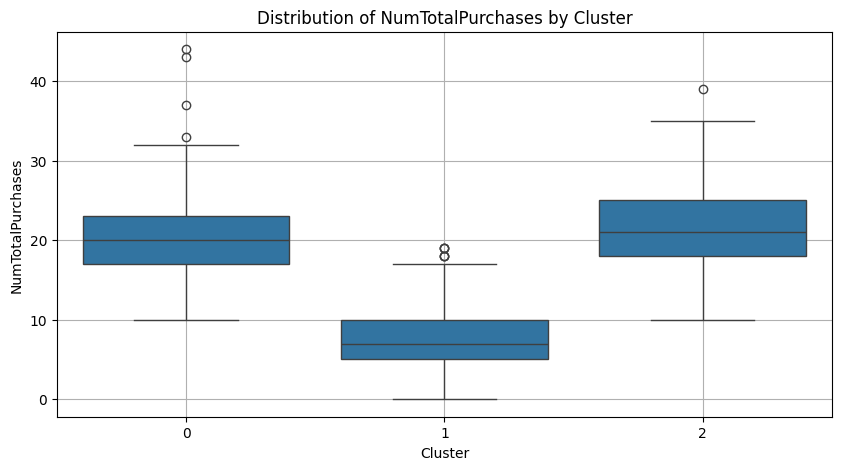

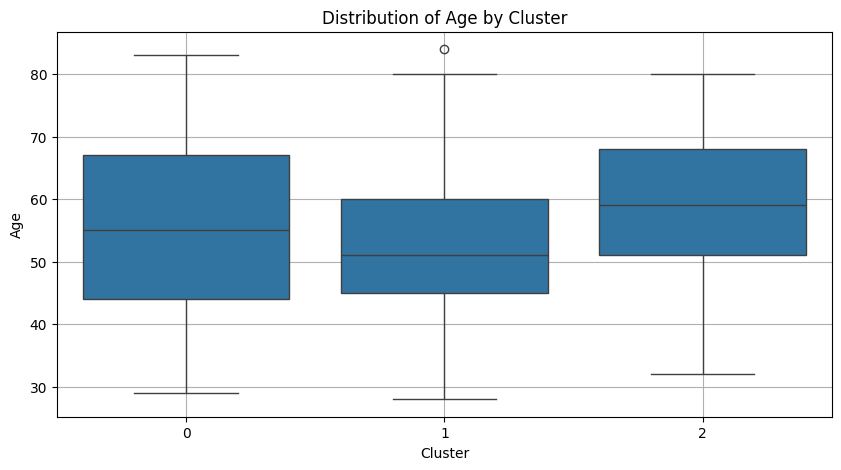

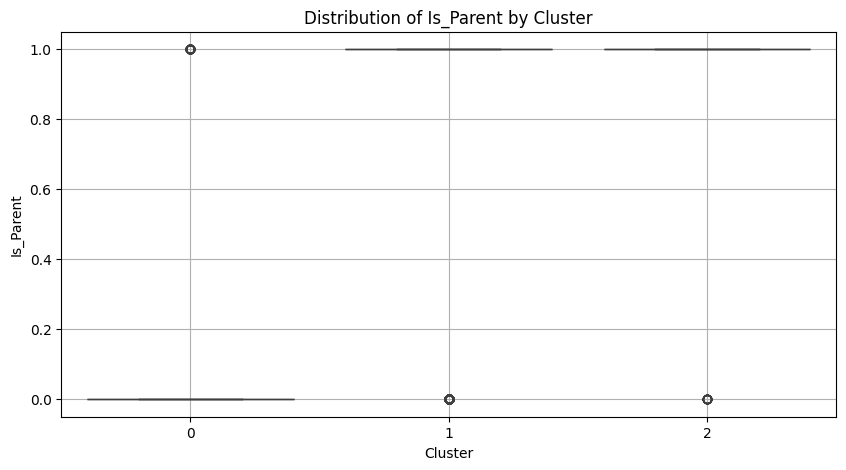

In [67]:
# Create a DataFrame with the original data and cluster labels
clustered_data = ds.copy()
clustered_data['Cluster'] = y_kmeans

# Plot the distribution of each original feature within each cluster
for col in ds.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Cluster', y=col, data=clustered_data)
    plt.title(f'Distribution of {col} by Cluster')
    plt.grid(True)
    plt.show()

Box plot of 'Income' shows that Cluster 1 has a higher median income than Cluster 2 and Cluster 3. Weinfer that Cluster 1 consists of higher-income customers.

Bar plot showing the size of each cluster. Useful to understand the distribution of data points among clusters.

Agglomerative Clustering

In [68]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat_AC = AC.fit_predict(pca_data)

# Adding the Clusters feature to the PCA-transformed DataFrame
PCA_ds = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])
PCA_ds['Clusters'] = yhat_AC

# Adding the Clusters feature to the original DataFrame
ds['Clusters'] = yhat_AC


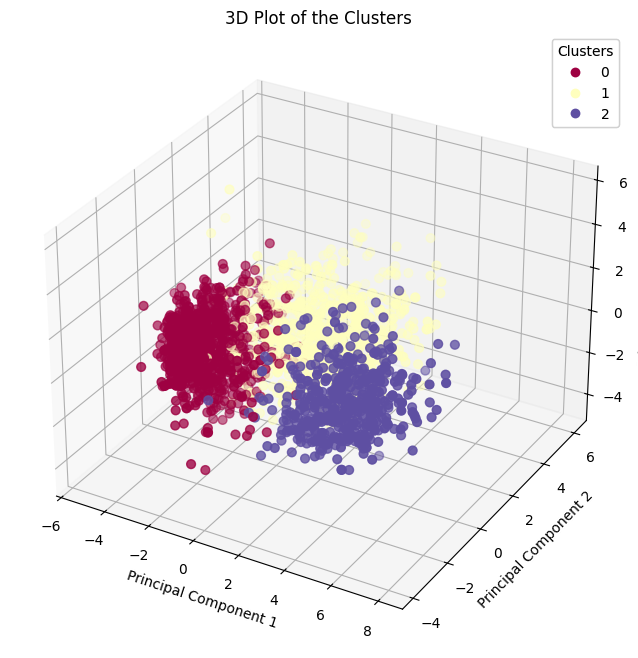

In [69]:
# Generate the first three principal components for 3D plotting
pca_3d_data = pca_data[:, :3]

# Create a DataFrame for the first three principal components with clusters
PCA_3D_df = pd.DataFrame(pca_3d_data, columns=['PC1', 'PC2', 'PC3'])
PCA_3D_df['Clusters'] = yhat_AC

# Define a colormap for the clusters
cmap = sns.color_palette('Spectral', as_cmap=True)

# Plotting the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(PCA_3D_df['PC1'], PCA_3D_df['PC2'], PCA_3D_df['PC3'], 
                s=40, c=PCA_3D_df['Clusters'], marker='o', cmap=cmap)
ax.set_title("3D Plot of the Clusters")
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Adding legend
legend1 = ax.legend(*sc.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

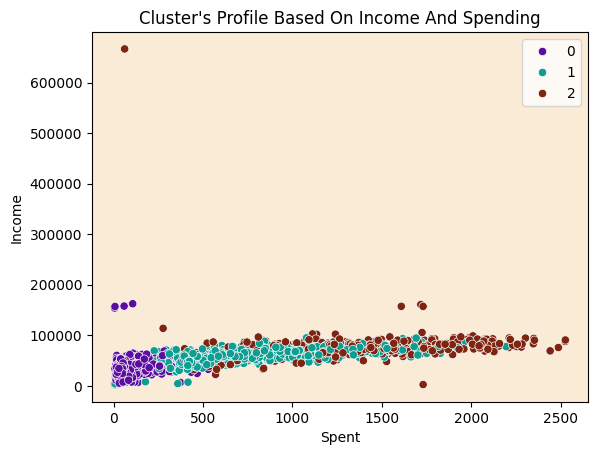

In [70]:
plt.gca().set_facecolor('#FAEBD7')  # Setting the background color of the plot area
#plt.gcf().set_facecolor('#FAEBD7')

pal = ["#5A0D9E", "#0D9E91", "#7E2411"]
pl = sns.scatterplot(data = ds,x=ds["Spent"], y=ds["Income"],hue=ds["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Group 0 indicates low spending and low income
Group 1 indicates moderate income spending and moderate-high spending income
Group 2 indicates high spending and high income

/Users/manasvi/Desktop/vscodefiles/Langchain/venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 78.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/manasvi/Desktop/vscodefiles/Langchain/venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 19.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/var/folders/qw/q9jnngpx46390nfgmkv09dqh0000gn/T/ipykernel_85152/2112293014.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(x=ds["Clusters"], y=ds["Spent"], palette=pal)
/Users/manasvi/Desktop/vscodefiles/Langchain/venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 83.2% of the points cannot be

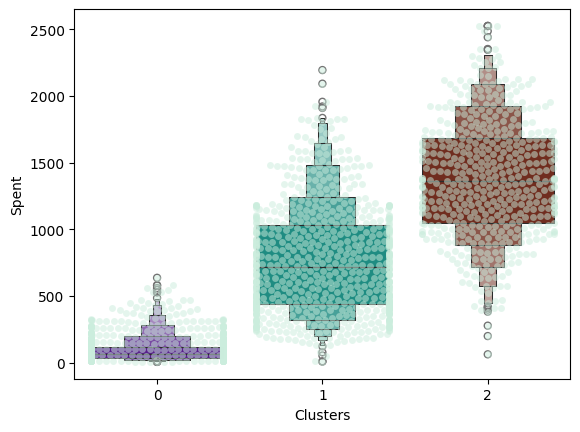

In [71]:
plt.figure()
pl=sns.swarmplot(x=ds["Clusters"], y=ds["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=ds["Clusters"], y=ds["Spent"], palette=pal)
plt.show()

From the above plot, it can be clearly seen that cluster 2 is our biggest set of customers closely followed by cluster 1. We can explore what each cluster is spending on for the targeted marketing strategies.

In [72]:
ds.head(10)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Relationship_Status,Children,Spent,TotalAcceptedCmp,NumTotalPurchases,Age,Is_Parent,Clusters
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,663,1,0,1617,1,25,67,0,2
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,113,1,2,27,0,6,70,1,0
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,312,0,0,776,0,21,59,0,2
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,139,0,1,53,0,8,40,1,0
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,161,0,1,422,0,19,43,1,1
5,0,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,293,0,1,716,0,22,57,1,1
6,0,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,593,1,1,590,0,21,53,1,1
7,1,33454.0,1,0,32,76,10,56,3,1,23,2,4,0,4,8,417,0,1,169,0,10,39,1,0
8,1,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,388,0,1,46,1,6,50,1,0
9,1,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,108,0,2,49,1,2,74,1,0


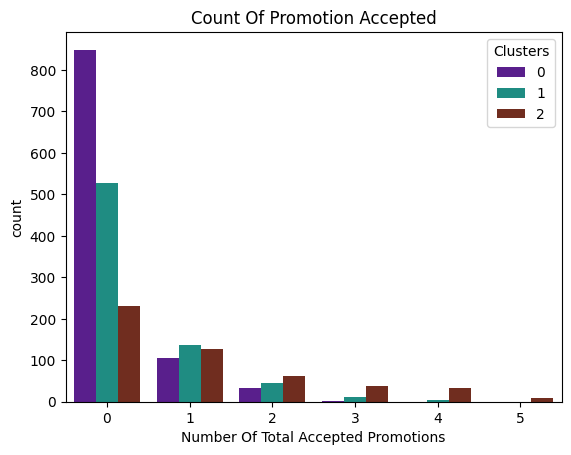

In [73]:
# plotting to check how our campaigns did 
plt.figure()
pl = sns.countplot(x=ds['TotalAcceptedCmp'],hue=ds['Clusters'], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

- We can say the campaigns haven't been very effective. Campaign 1 did decently well. People with low income accepted a promotion in campaign 1 more than the others.
- Moreover, the other ones did not perform well at all. Perhaps better campaign strategies are needed.